In [1]:
import torch
from torchvision import transforms
import torchvision
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ds_path = 'datasets/'

In [3]:
def totensor():
    return transforms.Compose([
        transforms.ToTensor(),
    ])

def normalize():
    return transforms.Compose([
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]),
    ])

def unnormalize():
    return transforms.Compose([
        transforms.Normalize(mean=[-0.4914/0.2023, -0.4822/0.1994, -0.4465/0.2010], 
                             std=[1./0.2023, 1./0.1994, 1./0.2010]),
    ])

In [4]:
train_data = torchvision.datasets.CIFAR10(ds_path, train=True, transform=totensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

Files already downloaded and verified


In [5]:
norm = normalize()

(img, label) = next(iter(train_loader))
img_org = img[0].data.clone().detach()
img_norm = norm(img_org)

In [6]:
torch.min(img[0]), torch.max(img[0])

(tensor(0.0627), tensor(0.9373))

In [7]:
torch.min(img_norm), torch.max(img_norm)

(tensor(-2.1189), tensor(2.2039))

Inverse Normalize

In [8]:
inverse_norm = unnormalize()

img_unnorm = inverse_norm(img_norm)
torch.min(img_unnorm), torch.max(img_unnorm)

(tensor(0.0627), tensor(0.9373))

Reshape image to (H,W,C)

In [9]:
img_hope = img_unnorm.permute(1,2,0)

In [10]:
img_hope.size()

torch.Size([32, 32, 3])

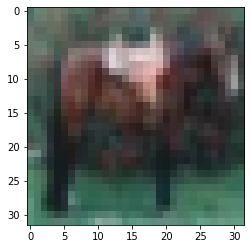

In [12]:
plt.imshow(img_hope)
plt.savefig('test.png')

In [9]:
print(np.load('results_2/test_acc__1.npy'))
print(np.load('results_2/test_acc__2.npy'))
print(np.load('results_2/test_acc__3.npy'))
print(np.load('results_2/test_acc__4.npy'))
print(np.load('results_2/test_acc__5.npy'))
print(np.load('results_2/test_acc__6.npy'))
print(np.load('results_2/test_acc__7.npy'))
print(np.load('results_2/test_acc__8.npy'))
print(np.load('results_2/test_acc__9.npy'))
print(np.load('results_2/test_acc__10.npy'))
print(np.load('results_2/test_acc__11.npy'))
print(np.load('results_2/test_acc__12.npy'))

0.4511
0.0001
0.0
0.0007
0.6962
0.1594
0.057
0.0331
0.8051
0.3788
0.0867
0.0381


In [3]:
np.load('test.npy')

array(1.9)